In [106]:
##### Jeu de données #####

# Import des données
import pandas as pd
pam50 = pd.read_csv("Data_Pam50.csv")

# Extraction des features (niveau d'expression de divers gènes) et des labels (type de cancer)
features = pam50[pam50.columns[2:]]
labels = pam50["subtype"]
print("features :", list(features.columns))
print(len(list(features.columns)))




features : ['ACTR3B', 'ANLN', 'BAG1', 'BCL2', 'BIRC5', 'BLVRA', 'CCNB1', 'CCNE1', 'CDC20', 'CDC6', 'CDCA1', 'CDH3', 'CENPF', 'CEP55', 'CXXC5', 'EGFR', 'ERBB2', 'ESR1', 'EXO1', 'FGFR4', 'FOXA1', 'FOXC1', 'GPR160', 'GRB7', 'KIF2C', 'KNTC2', 'KRT14', 'KRT17', 'KRT5', 'MAPT', 'MDM2', 'MELK', 'MIA', 'MKI67', 'MLPH', 'MMP11', 'MYBL2', 'MYC', 'NAT1', 'ORC6L', 'PGR', 'PHGDH', 'PTTG1', 'RRM2', 'SFRP1', 'SLC39A6', 'TMEM45B', 'TYMS', 'UBE2C', 'UBE2T']
50


In [104]:
##### Tester ce qu'il se passe si on supprime les features les plus importantes #####

# Import des données
import pandas as pd
pam50 = pd.read_csv("Data_Pam50.csv")

##### Change #####
#pam50 = pam50.drop(columns=["FOXA1","CDH3","RRM2", "UBE2T"])               #Drop some columns
#pam50 = pam50[["Unnamed: 0", "subtype", "CDH3", "RRM2", "UBE2T"]]          # Keep some columns

# Extraction des features (niveau d'expression de divers gènes) et des labels (type de cancer)
features = pam50[pam50.columns[2:]]
labels = pam50["subtype"]
print("features :", list(features.columns))
print(len(list(features.columns)))

features : ['CDH3', 'RRM2', 'UBE2T']
3


              precision    recall  f1-score   support

       Basal       0.91      0.94      0.92     19753
        Her2       0.68      0.80      0.73     21211
        LumA       0.70      0.64      0.67     13320
        LumB       0.73      0.65      0.69     12868
      Normal       0.91      0.78      0.84     12848

    accuracy                           0.78     80000
   macro avg       0.79      0.76      0.77     80000
weighted avg       0.78      0.78      0.78     80000



<AxesSubplot:>

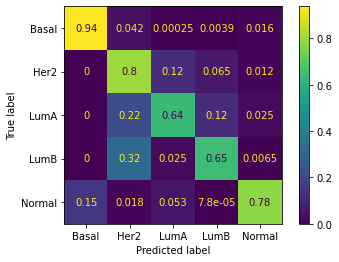

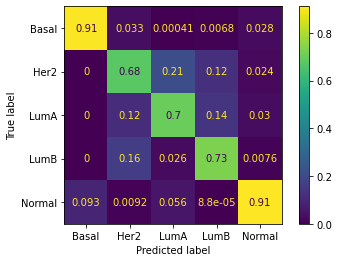

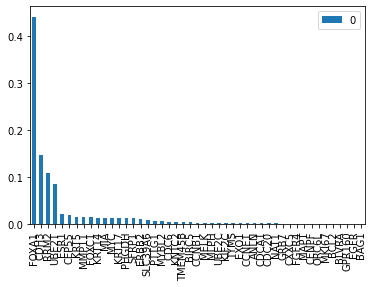

In [107]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import numpy as np
#Paramétrage du classifieur


classifier = tree.DecisionTreeClassifier(max_depth = 3)

repeats = 10000

cumul_prediction = np.empty((8*repeats),dtype = object)  
cumul_test_label = np.empty((8*repeats),dtype = object)  
cumul_feature_importance = pd.DataFrame([0]*len(list(features.columns)), index=features.columns, columns = [0])

for i in range(repeats) :
    # Séparation des jeux de données et test
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.1)
    while(set(train_labels.unique()) != set(test_labels.unique())) :
        train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.1)
    
    # Apprentissage
    classifier = classifier.fit(train_features, train_labels)

    # Test
    cumul_prediction[i*8:(i+1)*8] = classifier.predict(test_features)
    cumul_test_label[i*8:(i+1)*8] = test_labels
    cumul_feature_importance += pd.DataFrame(classifier.feature_importances_, index = features.columns)




metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(cumul_test_label, cumul_prediction, normalize="true"),display_labels = ["Basal","Her2","LumA","LumB","Normal"]).plot()
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(cumul_test_label, cumul_prediction, normalize="pred"),display_labels = ["Basal","Her2","LumA","LumB","Normal"]).plot()
# ,display_labels = ["Basal","Her2","LumA","LumB","Normal"]

print(metrics.classification_report(cumul_test_label, cumul_prediction, zero_division = 0))

cumul_feature_importance /= repeats
cumul_feature_importance = cumul_feature_importance[cumul_feature_importance[0] > 0].sort_values(0, ascending=False)
cumul_feature_importance.plot(kind = "bar")




In [4]:
"""

Stopping criterias :

max_depth = None : 75%
max_depth = 5 : 75%
max_debth = 4 : 76%
max_depth = 3 : 78%
max_depth = 2 : 57%
max_depth = 1 : 50%
_____________________________
Approach :

criterion = "gini" : 75%
criterion = "entropy" : 73%

splitter = "best" : 75%
splitter = "random" : 75%

max_features = 50/None : 75%
max_features = 25 : 73%
max_features = 10 : 71%
max_features = 5 : 69%
max_features = 1 :60
_____________________________
Other :
ccp_alpha = 0 : 75%
ccp_alpha = 0.001 : 76%
ccp_alpha = 0.005 : 76%
ccp_alpha = 0.01 : 76%
ccp_alpha = 0.1 : 63%
ccp_alpha = 1 : 25%

_____________________________
Combinaisons : 

ccp_alpha = 0.005, max_depth = 4 : 76
ccp_alpha = 0.005, max_depth = 3 : 77
ccp_alpha = 0.005, max_depth = 3 : 58

max_depth = 3, criterion="entropy" : 73
max_depth = 3, splitter = "random" : 68

"""


'\n\nStopping criterias :\n\nmax_depth = None : 75%\nmax_depth = 5 : 75%\nmax_debth = 4 : 76%\nmax_depth = 3 : 78%\nmax_depth = 2 : 57%\nmax_depth = 1 : 50%\n_____________________________\nApproach :\n\ncriterion = "gini" : 75%\ncriterion = "entropy" : 73%\n\nsplitter = "best" : 75%\nsplitter = "random" : 75%\n\nmax_features = 50/None : 75%\nmax_features = 25 : 73%\nmax_features = 10 : 71%\nmax_features = 5 : 69%\nmax_features = 1 :60\n_____________________________\nOther :\nccp_alpha = 0 : 75%\nccp_alpha = 0.001 : 76%\nccp_alpha = 0.005 : 76%\nccp_alpha = 0.01 : 76%\nccp_alpha = 0.1 : 63%\nccp_alpha = 1 : 25%\n\n_____________________________\nCombinaisons : \n\nccp_alpha = 0.005, max_depth = 4 : 76\nccp_alpha = 0.005, max_depth = 3 : 77\nccp_alpha = 0.005, max_depth = 3 : 58\n\nmax_depth = 3, criterion="entropy" : 73\nmax_depth = 3, splitter = "random" : 68\n\n'